In [1]:
import numpy as np
import qetpy as qp
import matplotlib.pyplot as plt

In [21]:
import matplotlib
matplotlib.rc('font', size=16)          # controls default text sizes
matplotlib.rc('axes', titlesize=16)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=16)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=16)    # legend fontsize
matplotlib.rc('figure', titlesize=16)  # fontsize of the figure title
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rc('figure.subplot', hspace=  0.4)
fs = 1/2e-9

### New noise

In [2]:

def noisefilter(n_waveform, processing, traces, sigmacut):
    if processing:
        traces=traces[:n_waveform*15000]
        print ('number of samples: ', traces.shape)
        traces = traces.reshape(n_waveform,15000)
    print ('waveforms shape: ', traces.shape)
    trace_index=[]
    for trace in np.arange(n_waveform):
        mean_, std_, bool_ =  qp.cut.iterstat(traces[trace][:], cut = sigmacut)
        index_ = [i for i, x in enumerate(bool_) if x == False]
        if len(index_) > 100:
            print ('trace number:', trace, 'has ', len(index_), 'samples as outliers')
            trace_index.append(trace)
    Traces_filtered = np.delete(traces, trace_index, axis=0)
    print ('Filtered trace shape: ',Traces_filtered.shape)   
    return trace_index, Traces_filtered

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### inputs

In [3]:
traces_noise = np.load('wavedump_noise/wavedump_noise2_Tl.npy')
n_waveform = 1000

#### filtering 

In [8]:
trace_index,  Traces_noise_filtered = noisefilter(n_waveform, True, traces_noise, 3)
np.save('wavedump_noise/wavedump_noise2_Tl_filtered.npy', Traces_noise_filtered)


number of samples:  (15000000,)
waveforms shape:  (1000, 15000)
trace number: 1 has  2838 samples as outliers
trace number: 26 has  1872 samples as outliers
trace number: 32 has  563 samples as outliers
trace number: 41 has  225 samples as outliers
trace number: 84 has  150 samples as outliers
trace number: 90 has  1586 samples as outliers
trace number: 92 has  2909 samples as outliers
trace number: 101 has  622 samples as outliers
trace number: 103 has  1057 samples as outliers
trace number: 129 has  117 samples as outliers
trace number: 131 has  1686 samples as outliers
trace number: 141 has  199 samples as outliers
trace number: 153 has  191 samples as outliers
trace number: 164 has  603 samples as outliers
trace number: 170 has  998 samples as outliers
trace number: 176 has  830 samples as outliers
trace number: 196 has  135 samples as outliers
trace number: 198 has  148 samples as outliers
trace number: 215 has  1150 samples as outliers
trace number: 232 has  490 samples as outlie

#### plotting

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Filtered trace flattened shape: (13665000,)


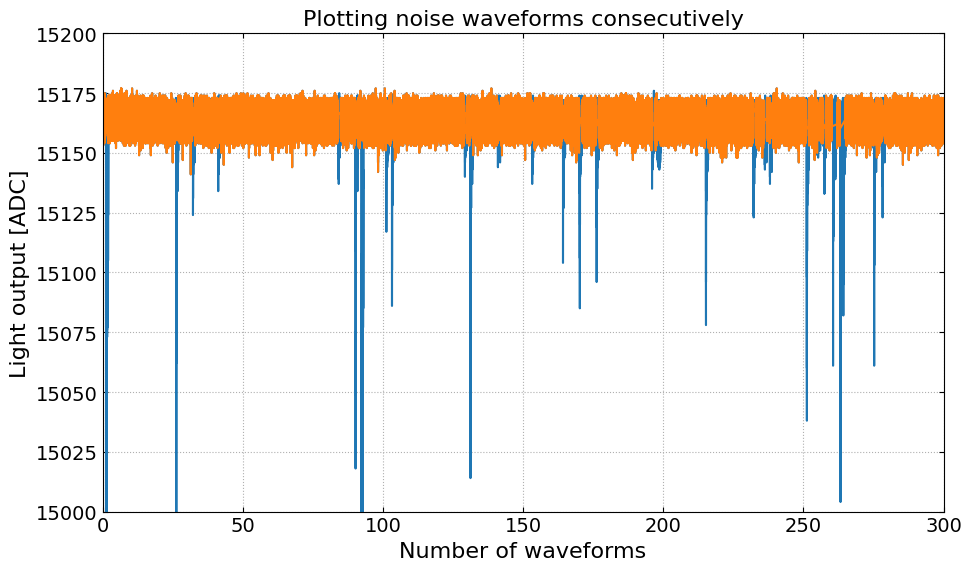

In [24]:
n_waveform = 1000
Traces_noise_f = Traces_noise_filtered.flatten()
print ('Filtered trace flattened shape:', Traces_noise_f.shape) 

arr = np.arange(n_waveform*15000).reshape(n_waveform,15000)
arr = np.delete(arr, trace_index, axis=0).flatten()
n_waveform = 300

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(traces_noise[:n_waveform*15000]))/15000, traces_noise[:n_waveform*15000], label = "noise ")
# ax.plot(np.arange(len(traces_noise_filtered)), traces_noise_filtered , label = "noise filtered")

ax.plot(arr[:n_waveform*15000]/15000, Traces_noise_f[:n_waveform*15000], label = "noise cleaned up")

ax.set_ylabel("Light output [ADC]", fontsize = 16)
ax.set_xlabel("Number of waveforms", fontsize = 16)
# ax.set_yscale('log')
ax.set_ylim(15000,15200)
ax.set_xlim(0,300)
ax.set_title("Plotting noise waveforms consecutively", fontsize = 16)
# lgd = ax.legend(loc="lower center", fontsize = 16)
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.grid(linestyle="dotted")
fig = ax.get_figure()
fig.tight_layout()

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(traces_noise[:n_waveform*15000])), traces_noise[:n_waveform*15000], label = "noise ")
# ax.plot(np.arange(len(traces_noise_filtered)), traces_noise_filtered , label = "noise filtered")

ax.plot(arr, Traces_noise_f, label = "noise filtered")

ax.set_ylabel("Light output [ADC]")
# ax.set_xlabel("Time [$\mu$s]")
# ax.set_yscale('log')
ax.set_xlim(0.472e6,0.4725e6)
ax.set_ylim(15000,15200)
ax.set_title("Plotting noise waveforms consecutively")
lgd = ax.legend(loc="lower center", fontsize = 16)
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.grid(linestyle="dotted")
fig = ax.get_figure()
fig.tight_layout()

In [ ]:
n_waveform = 100


traces_noise_p = np.load('wavedump_noise/wavedump_noise_p_1.npy')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(traces_noise_p[:n_waveform*15000]))/15000, traces_noise_p[:n_waveform*15000], label = "noise CsI-pure")
# ax.plot(np.arange(len(traces_noise_filtered)), traces_noise_filtered , label = "noise filtered")

# ax.plot(arr, Traces_noise_p_f, label = "noise filtered")

ax.set_ylabel("Light output [ADC]", fontsize = 16)
ax.set_xlabel("Waveforms", fontsize = 16)
# ax.set_yscale('log')
# ax.set_xlim(0.472e6,0.4725e6)
ax.set_ylim(15100,15300)
ax.set_title("Plotting noise waveforms consecutively")
lgd = ax.legend(loc="lower center", fontsize = 16)
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.grid(linestyle="dotted")
fig = ax.get_figure()
fig.tight_layout()

In [3]:
n_waveform = 1000

trace_index_p,  Traces_noise_filtered_p = noisefilter(n_waveform, traces_noise_p, 3)
np.save('wavedump_noise/wavedump_noise_p_filtered_1.npy', Traces_noise_filtered_p)

NameError: name 'traces_noise_p' is not defined

### 2nd layer

In [12]:
traces_noise_Tl = np.load('wavedump_noise/wavedump_noise2_Tl_filtered.npy')
n_waveform = len(traces_noise_Tl)

trace_index_Tl,  Traces_noise_filtered_Tl = noisefilter(n_waveform, False, traces_noise_Tl,3)
np.save('wavedump_noise/wavedump_noise2_Tl_filtered_1.npy', Traces_noise_filtered_Tl)
Traces_noise_Tl_f = Traces_noise_filtered_Tl.flatten()
print ('Filtered trace flattened shape:', Traces_noise_Tl_f.shape) 


waveforms shape:  (911, 15000)
Filtered trace shape:  (911, 15000)
Filtered trace flattened shape: (13665000,)


In [13]:

print (n_waveform)
arr = np.arange(n_waveform*15000).reshape(n_waveform,15000)
arr = np.delete(arr, trace_index_Tl, axis=0).flatten()
print(arr.shape)

911
(13665000,)


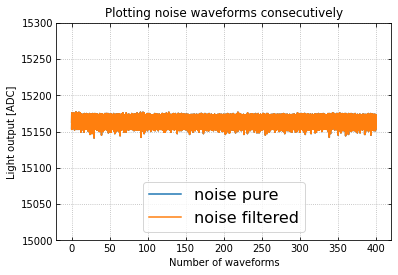

In [14]:

n_waveform=400
# fig, ax = plt.subplots(dpi=100)
plt.plot(np.arange(n_waveform*15000)/15000, traces_noise_Tl.flatten()[:n_waveform*15000], label = "noise pure")
plt.plot(arr[:n_waveform*15000]/15000, Traces_noise_Tl_f[:n_waveform*15000], label = "noise filtered")

plt.ylabel("Light output [ADC]")
plt.xlabel("Number of waveforms")
# plt.xlim(226.25,226.5)
plt.ylim(15000,15300)
plt.title("Plotting noise waveforms consecutively")
plt.legend(loc="lower center", fontsize = 16)
plt.tick_params(which="both", direction="in", right=True, top=True)
plt.grid(linestyle="dotted")
# fig = plt.get_figure()
# fig.tight_layout()

In [45]:
traces_noise_p = np.load('wavedump_noise/wavedump_noise2_p_filtered.npy')
n_waveform = len(traces_noise_p)

trace_index_p,  Traces_noise_filtered_p = noisefilter(n_waveform, False, traces_noise_p, 2.8)
np.save('wavedump_noise/wavedump_noise2_p_filtered_1.npy', Traces_noise_filtered_p)


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


waveforms shape:  (977, 15000)
trace number: 5 has  136 samples as outliers
trace number: 8 has  125 samples as outliers
trace number: 11 has  131 samples as outliers
trace number: 14 has  141 samples as outliers
trace number: 15 has  122 samples as outliers
trace number: 18 has  129 samples as outliers
trace number: 21 has  115 samples as outliers
trace number: 26 has  141 samples as outliers
trace number: 27 has  121 samples as outliers
trace number: 30 has  116 samples as outliers
trace number: 37 has  128 samples as outliers
trace number: 39 has  139 samples as outliers
trace number: 40 has  130 samples as outliers
trace number: 41 has  135 samples as outliers
trace number: 44 has  129 samples as outliers
trace number: 51 has  183 samples as outliers
trace number: 52 has  130 samples as outliers
trace number: 53 has  141 samples as outliers
trace number: 54 has  136 samples as outliers
trace number: 55 has  160 samples as outliers
trace number: 56 has  130 samples as outliers
trace

trace number: 558 has  110 samples as outliers
trace number: 564 has  119 samples as outliers
trace number: 568 has  121 samples as outliers
trace number: 570 has  118 samples as outliers
trace number: 573 has  141 samples as outliers
trace number: 574 has  127 samples as outliers
trace number: 577 has  136 samples as outliers
trace number: 579 has  124 samples as outliers
trace number: 580 has  132 samples as outliers
trace number: 581 has  132 samples as outliers
trace number: 587 has  146 samples as outliers
trace number: 595 has  122 samples as outliers
trace number: 596 has  115 samples as outliers
trace number: 597 has  124 samples as outliers
trace number: 598 has  128 samples as outliers
trace number: 599 has  127 samples as outliers
trace number: 604 has  164 samples as outliers
trace number: 610 has  130 samples as outliers
trace number: 616 has  133 samples as outliers
trace number: 617 has  106 samples as outliers
trace number: 619 has  159 samples as outliers
trace number:

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(977, 15000) (654, 15000)
Filtered trace flattened shape: (9810000,) 654.0


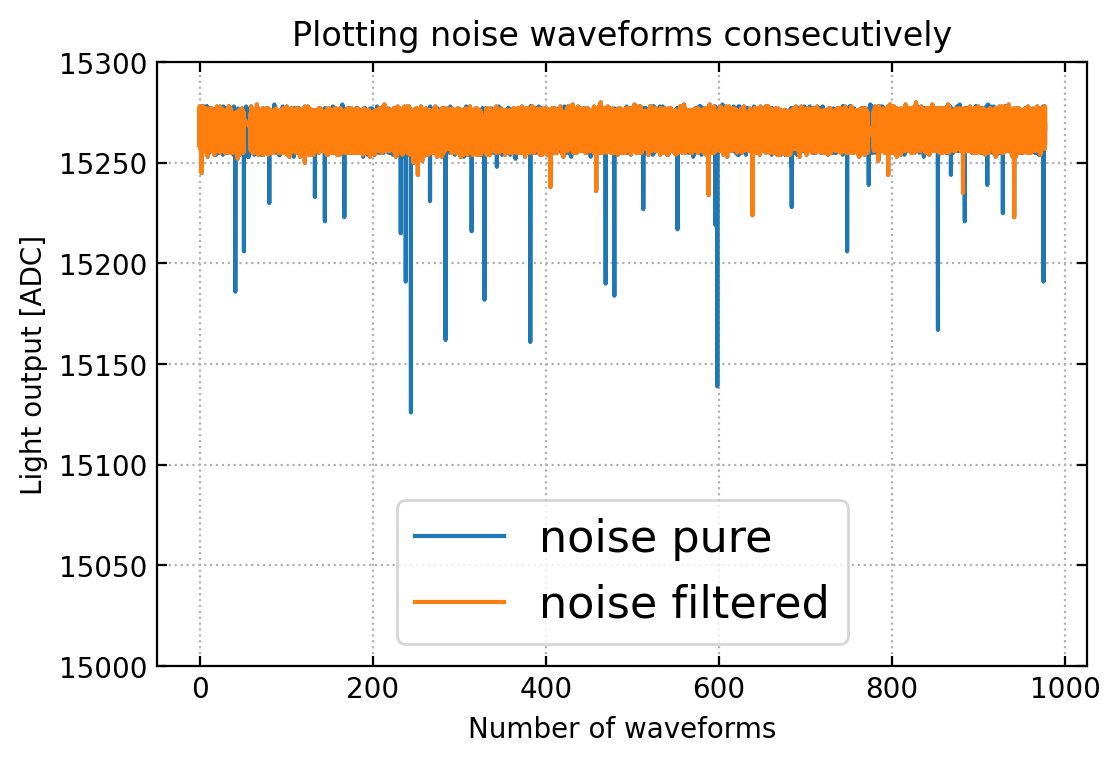

In [47]:
n_waveform = len(traces_noise_p)
print(traces_noise_p[:n_waveform_].shape, Traces_noise_filtered_p.shape)
Traces_noise_p_f = Traces_noise_filtered_p.flatten()
print ('Filtered trace flattened shape:', Traces_noise_p_f.shape, len(Traces_noise_p_f)/15000) 
arr = np.arange(n_waveform*15000).reshape(n_waveform,15000)
arr = np.delete(arr, trace_index_p, axis=0).flatten()
plt.figure(dpi=200)

# fig, ax = plt.subplots(dpi=100)
plt.plot(np.arange(n_waveform*15000)/15000, traces_noise_p.flatten(), label = "noise pure")
plt.plot(arr/15000, Traces_noise_p_f, label = "noise filtered")

plt.ylabel("Light output [ADC]")
plt.xlabel("Number of waveforms")
# plt.xlim(41.2,41.4)
plt.ylim(15000,15300)
plt.title("Plotting noise waveforms consecutively")
plt.legend(loc="lower center", fontsize = 16)
plt.tick_params(which="both", direction="in", right=True, top=True)
plt.grid(linestyle="dotted")
# fig = plt.get_figure()
# fig.tight_layout()

In [48]:
traces_noise_p = np.load('wavedump_noise/wavedump_noise2_p_filtered.npy')
n_waveform = len(traces_noise_p)

trace_index_p,  Traces_noise_filtered_p = noisefilter(n_waveform, False, traces_noise_p, 2.7)
np.save('wavedump_noise/wavedump_noise2_p_filtered_1.npy', Traces_noise_filtered_p)


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


waveforms shape:  (977, 15000)
trace number: 2 has  131 samples as outliers
trace number: 3 has  139 samples as outliers
trace number: 5 has  136 samples as outliers
trace number: 6 has  127 samples as outliers
trace number: 7 has  146 samples as outliers
trace number: 8 has  125 samples as outliers
trace number: 11 has  131 samples as outliers
trace number: 12 has  137 samples as outliers
trace number: 14 has  141 samples as outliers
trace number: 15 has  122 samples as outliers
trace number: 16 has  124 samples as outliers
trace number: 18 has  129 samples as outliers
trace number: 19 has  128 samples as outliers
trace number: 20 has  135 samples as outliers
trace number: 21 has  115 samples as outliers
trace number: 23 has  146 samples as outliers
trace number: 24 has  119 samples as outliers
trace number: 25 has  139 samples as outliers
trace number: 26 has  141 samples as outliers
trace number: 27 has  121 samples as outliers
trace number: 28 has  129 samples as outliers
trace num

trace number: 210 has  140 samples as outliers
trace number: 212 has  118 samples as outliers
trace number: 213 has  133 samples as outliers
trace number: 214 has  129 samples as outliers
trace number: 215 has  124 samples as outliers
trace number: 216 has  119 samples as outliers
trace number: 217 has  145 samples as outliers
trace number: 218 has  148 samples as outliers
trace number: 219 has  134 samples as outliers
trace number: 220 has  135 samples as outliers
trace number: 221 has  129 samples as outliers
trace number: 222 has  130 samples as outliers
trace number: 223 has  127 samples as outliers
trace number: 225 has  107 samples as outliers
trace number: 226 has  146 samples as outliers
trace number: 227 has  148 samples as outliers
trace number: 229 has  131 samples as outliers
trace number: 230 has  117 samples as outliers
trace number: 232 has  185 samples as outliers
trace number: 233 has  138 samples as outliers
trace number: 235 has  138 samples as outliers
trace number:

trace number: 424 has  140 samples as outliers
trace number: 425 has  118 samples as outliers
trace number: 426 has  131 samples as outliers
trace number: 428 has  135 samples as outliers
trace number: 429 has  116 samples as outliers
trace number: 430 has  129 samples as outliers
trace number: 432 has  143 samples as outliers
trace number: 434 has  107 samples as outliers
trace number: 435 has  155 samples as outliers
trace number: 436 has  122 samples as outliers
trace number: 437 has  150 samples as outliers
trace number: 438 has  136 samples as outliers
trace number: 440 has  120 samples as outliers
trace number: 442 has  133 samples as outliers
trace number: 443 has  135 samples as outliers
trace number: 444 has  132 samples as outliers
trace number: 445 has  121 samples as outliers
trace number: 446 has  125 samples as outliers
trace number: 448 has  131 samples as outliers
trace number: 449 has  115 samples as outliers
trace number: 450 has  140 samples as outliers
trace number:

trace number: 641 has  132 samples as outliers
trace number: 642 has  137 samples as outliers
trace number: 643 has  165 samples as outliers
trace number: 644 has  134 samples as outliers
trace number: 645 has  130 samples as outliers
trace number: 646 has  137 samples as outliers
trace number: 647 has  115 samples as outliers
trace number: 648 has  116 samples as outliers
trace number: 650 has  121 samples as outliers
trace number: 651 has  126 samples as outliers
trace number: 652 has  139 samples as outliers
trace number: 653 has  143 samples as outliers
trace number: 654 has  131 samples as outliers
trace number: 655 has  129 samples as outliers
trace number: 658 has  111 samples as outliers
trace number: 659 has  132 samples as outliers
trace number: 660 has  126 samples as outliers
trace number: 661 has  145 samples as outliers
trace number: 662 has  146 samples as outliers
trace number: 663 has  137 samples as outliers
trace number: 664 has  135 samples as outliers
trace number:

trace number: 847 has  117 samples as outliers
trace number: 848 has  133 samples as outliers
trace number: 851 has  138 samples as outliers
trace number: 852 has  118 samples as outliers
trace number: 853 has  184 samples as outliers
trace number: 854 has  134 samples as outliers
trace number: 856 has  126 samples as outliers
trace number: 857 has  114 samples as outliers
trace number: 858 has  149 samples as outliers
trace number: 859 has  124 samples as outliers
trace number: 861 has  145 samples as outliers
trace number: 862 has  127 samples as outliers
trace number: 863 has  127 samples as outliers
trace number: 864 has  147 samples as outliers
trace number: 865 has  122 samples as outliers
trace number: 866 has  146 samples as outliers
trace number: 867 has  119 samples as outliers
trace number: 868 has  174 samples as outliers
trace number: 869 has  139 samples as outliers
trace number: 870 has  144 samples as outliers
trace number: 871 has  126 samples as outliers
trace number:

(977, 15000) (162, 15000)
Filtered trace flattened shape: (2430000,) 162.0


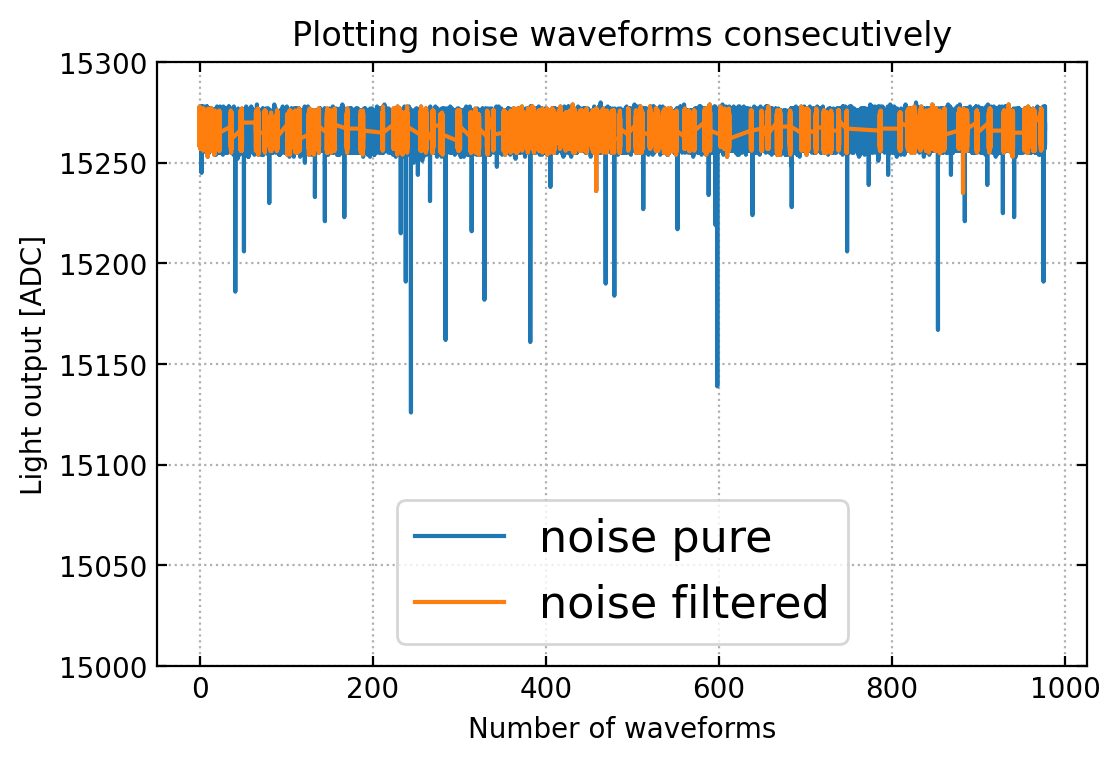

In [49]:
n_waveform = len(traces_noise_p)
print(traces_noise_p[:n_waveform_].shape, Traces_noise_filtered_p.shape)
Traces_noise_p_f = Traces_noise_filtered_p.flatten()
print ('Filtered trace flattened shape:', Traces_noise_p_f.shape, len(Traces_noise_p_f)/15000) 
arr = np.arange(n_waveform*15000).reshape(n_waveform,15000)
arr = np.delete(arr, trace_index_p, axis=0).flatten()

plt.figure(dpi=200)
# fig, ax = plt.subplots(dpi=100)
plt.plot(np.arange(n_waveform*15000)/15000, traces_noise_p.flatten(), label = "noise pure")
plt.plot(arr/15000, Traces_noise_p_f, label = "noise filtered")

plt.ylabel("Light output [ADC]")
plt.xlabel("Number of waveforms")
# plt.xlim(41.2,41.4)
plt.ylim(15000,15300)
plt.title("Plotting noise waveforms consecutively")
plt.legend(loc="lower center", fontsize = 16)
plt.tick_params(which="both", direction="in", right=True, top=True)
plt.grid(linestyle="dotted")
# fig = plt.get_figure()
# fig.tight_layout()

### Old noise

In [ ]:
n_waveform = 500
traces_noise_o = np.load('wavedump_noise/wavedump_noise_Tl.npy')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(traces_noise_o)), traces_noise_o, label = "noise ")


In [ ]:

Traces_noise_o= traces_noise_o[:n_waveform*15000]
print (Traces_noise_o.shape)
Traces_noise_o = Traces_noise_o.reshape(n_waveform,15000)
print (Traces_noise_o.shape)
trace_index_o = []
for trace in np.arange(n_waveform):
    mean_, std_, bool_ =  qp.cut.iterstat(Traces_noise_o[trace][:], cut = 3)
    index_ = [i for i, x in enumerate(bool_) if x == False]
    if len(index_) > 100:
        print ('trace number:', trace, 'has ', len(index_), 'samples as outliers')
        trace_index_o.append(trace)
print (trace_index_o)

#### removing only samples which are outliers (wrong method)

In [ ]:
n=1500000
mean_, std_, bool_ =  qp.cut.iterstat(traces_noise[:n], cut = 4)
print (mean_.shape, bool_.shape)
index_ = [i for i, x in enumerate(bool_) if x == False]
print ('number of outlier samples: ', len(index_), 'in', n)
traces_noise_filtered = np.delete(traces_noise[:n],index_)

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(n), traces_noise[:n], label = "noise ")
ax.plot(np.arange(len(traces_noise_filtered)), traces_noise_filtered , label = "noise filtered")
ax.set_ylabel("Light output [ADC]")
ax.set_xlabel("Time [$\mu$s]")
# ax.set_yscale('log')
# ax.set_xlim(0,15200)
ax.set_ylim(15140,15200)
ax.set_title("Plotting noise waveform consecutively")
lgd = ax.legend(loc="lower right")
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.grid(linestyle="dotted")
fig = ax.get_figure()
fig.tight_layout()